# Tải tệp dữ liệu vào dataframe

In [77]:
import pandas as pd
import numpy as np

In [78]:
dataset_path = r"C:\Users\pc\Documents\Test_finpro\Data\FPT.csv"
df_fpt = pd.read_csv(dataset_path)
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


# Xử lý dữ liệu

## Kiểm tra và xử lý dữ liệu Na

In [79]:
missing_data = df_fpt.isnull()
missing_data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [80]:
# Kiểm tra xem các trường dữ liệu ở mỗi cột có dữ liệu trống không
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts(), "\n")

Ticker
False    97406
Name: Ticker, dtype: int64 

Date/Time
False    97406
Name: Date/Time, dtype: int64 

Open
False    97406
Name: Open, dtype: int64 

High
False    97406
Name: High, dtype: int64 

Low
False    97406
Name: Low, dtype: int64 

Close
False    97406
Name: Close, dtype: int64 

Volume
False    97406
Name: Volume, dtype: int64 

Open Interest
False    97406
Name: Open Interest, dtype: int64 



Dựa trên kết quả kể trên thì tập dữ liệu không có dữ liệu trống

## Kiểm tra và sửa lại các định dạng dữ liệu ở mỗi cột cho hợp lý

In [81]:
df_fpt.dtypes

Ticker            object
Date/Time         object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Open Interest      int64
dtype: object

Dựa trên thông tin kể trên, có thể thấy cột Date/Time đang có định dạng không đúng nên ta cần chỉnh lại

In [82]:
df_fpt[["Date/Time"]] = df_fpt[["Date/Time"]].astype("datetime64")

In [83]:
#Check lại dữ liệu sau khi xử lý
df_fpt.dtypes

Ticker                   object
Date/Time        datetime64[ns]
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
Open Interest             int64
dtype: object

In [84]:
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0


# Phân tích dữ liệu khám phá

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Phân tích dữ liệu ngày tháng

In [86]:
# Do dữ liệu đang là dạng datetime, để tiện xem dữ liệu theo ngày tạm thời đổi sang date
date_frame = df_fpt["Date/Time"].dt.date.to_frame()
print("Tập dữ liệu chứa thông tin giá cổ phiếu từ ngày", min(date_frame["Date/Time"]), "đến ngày", max(date_frame["Date/Time"]))
print("Tổng số ngày là", (max(date_frame["Date/Time"]) - min(date_frame["Date/Time"])).days, "ngày")

Tập dữ liệu chứa thông tin giá cổ phiếu từ ngày 2018-12-25 đến ngày 2020-12-22
Tổng số ngày là 728 ngày


In [87]:
# Xem dữ liệu thống kê tổng quát
df_fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


## Xem sự phân bố dữ liệu của từng trường dữ liệu bằng biểu đồ hộp

<Axes: >

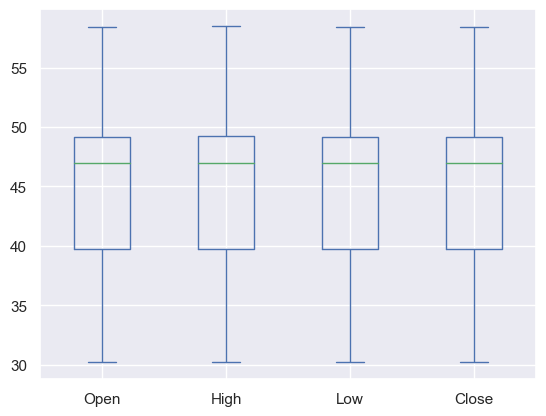

In [88]:
df_fpt[["Open", "High", "Low", "Close"]].plot(kind='box')

## Xem biến động giá đóng cửa qua biểu đồ

Text(0.5, 1.0, 'Giá cổ phiếu FPT')

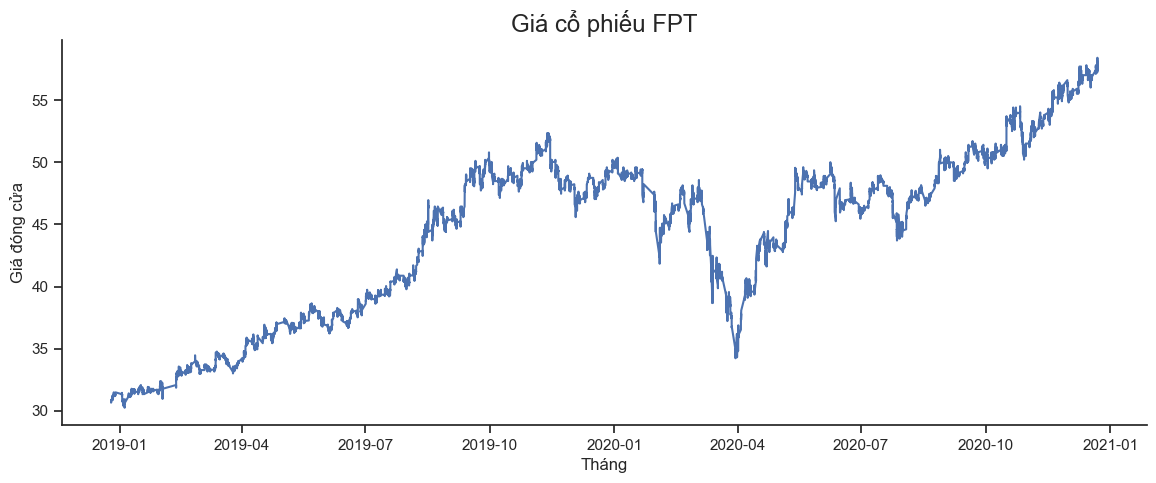

In [89]:
plt.figure(figsize=(14, 5))
sns.set_style("ticks")
sns.lineplot(data=df_fpt, x="Date/Time", y="Close")
sns.despine()
plt.xlabel("Tháng")
plt.ylabel("Giá đóng cửa")
plt.title("Giá cổ phiếu FPT", size="x-large")

Nhìn chung giá cổ phiếu FPT có xu hướng tăng qua từng tháng, duy chỉ có giai đoạn từ tháng 12-2019 đến tháng 04-2020 cổ phiếu giảm mạnh do tác động của dịch Covid dẫn đến hoạt động kinh tế toàn cầu bị tê liệt, cổ phiếu giảm mạnh theo xu hướng chung của toàn thế giới.

Vì vậy với kiểu xu hướng dữ liệu như thế này, chúng ta sẽ sử dụng mô hình học máy hồi quy tuyến tính hoặc hồi quy đa thức để xây dựng mô hình dự báo biến động giá cổ phiếu trong tương lai. Việc sử dụng mô hình nào sẽ phụ thuộc và kết quả đánh giá sau đó khi ta chi tập dữ liệu thành phần để train và phần để test mô hình.

# Phát triển mô hình

## Mô hình hồi quy tuyến tính

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [91]:
# Do ta cần train dữ liệu dựa trên date/time nên cần chia dữ liệu dạng này ra thành từng ngày, tháng, năm, giờ và phút
# nhằm train mô hình
df_fpt['date'] = df_fpt['Date/Time'].dt.day
df_fpt['month'] = df_fpt['Date/Time'].dt.month
df_fpt['year'] = df_fpt['Date/Time'].dt.year
df_fpt['hour'] = df_fpt['Date/Time'].dt.hour
df_fpt['minute'] = df_fpt['Date/Time'].dt.minute
df_fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,date,month,year,hour,minute
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0,25,12,2018,9,15
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0,25,12,2018,9,16
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0,25,12,2018,9,17
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0,25,12,2018,9,18
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0,25,12,2018,9,19


In [92]:
x_data = df_fpt[['date', 'month', 'year', 'hour', 'minute']]
y_data = df_fpt['Close']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)
print("Số lượng mẫu để huấn luyện mô hình:", x_train.shape[0])
print("Số lượng mẫu để kiểm tra mô hình:", x_test.shape[0])

Số lượng mẫu để huấn luyện mô hình: 77924
Số lượng mẫu để kiểm tra mô hình: 19482


In [93]:
# Tạo dựng và huấn luyện mô hình hồi quy tuyến tính đa biến
lre = LinearRegression()
lre.fit(x_train, y_train)

LinearRegression()

Thực hiện kiểm tra mô hình với chính tập dữ liệu dùng để huấn luyện

yhat_train = lre.predict(x_train)

In [94]:
# Tạo đồ thị phân phối để trực quan hóa dữ so sánh giữa dữ liệu trả về bởi mô hình với dữ liệu thực tế dùng để huấn luyện
"""ActualFunction là tập dữ liệu thực thế dùng đẻ train
   ModelFunction là tập dữ liệu trả về (biến yhat_train) sau khi áp dụng mô hình
   ActualName và ModelName là những biến tên để hiển thị trên biểu đồ"""
def DistributionPlot(ActualFunction, ModelFunction, ActualName, ModelName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
    ax1 = sns.distplot(ModelFunction, hist=False, color='b', label=ModelName)
    
    plt.title(Title)
    plt.xlabel("Giá (theo VND)")
    plt.ylabel("Xác suất thời điểm có giá này")
    plt.legend()
    
    plt.show()
    plt.close()

C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

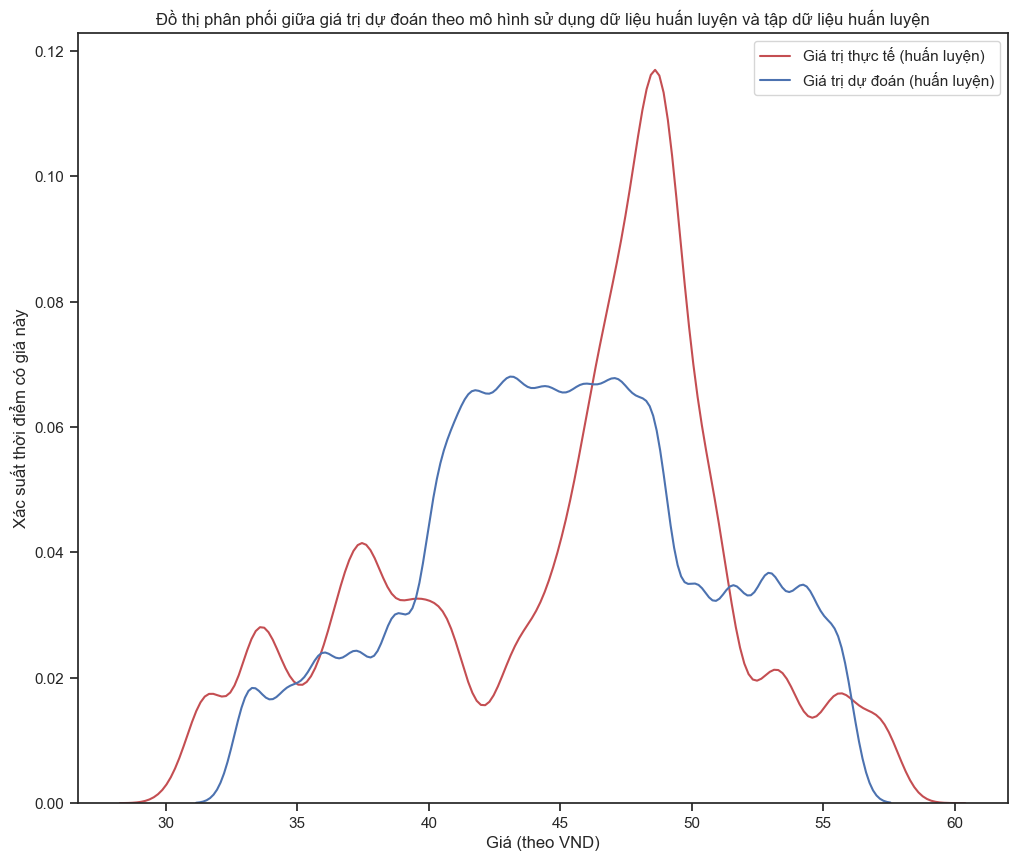

In [95]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu huấn luyện và tập dữ liệu huấn luyện"
DistributionPlot(y_train, yhat_train, "Giá trị thực tế (huấn luyện)", "Giá trị dự đoán (huấn luyện)", Title)

In [96]:
# Kiểm tra chỉ số R^2 để xem xét độ chính xác của mô hình
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là", lre.score(x_train, y_train))

Chỉ số R^2 của mô hình đối với tệp dữ liệu huấn luyện là 0.7725072654169218


Thực hiện kiểm tra mô hình với tập dữ liệu test

In [97]:
yhat_test = lre.predict(x_test)

C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

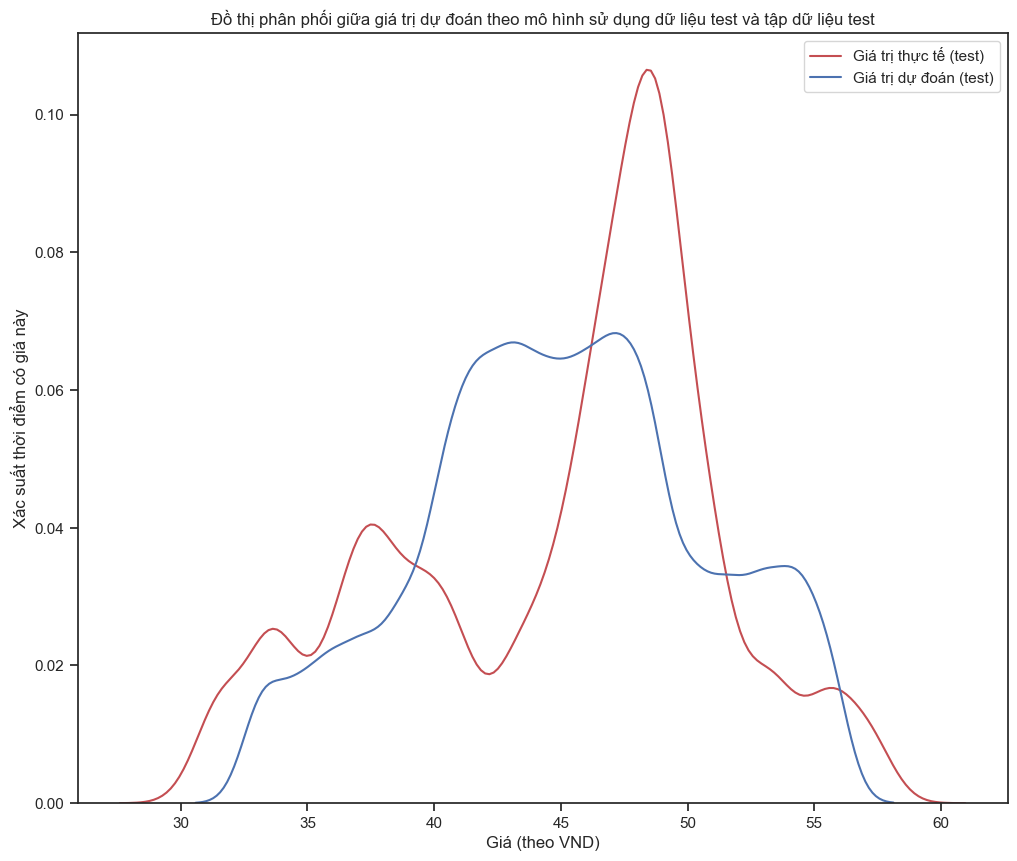

In [98]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, yhat_test, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [99]:
# Kiểm tra chỉ số R^2
print("Chỉ số R^2 của mô hình đối với tệp dữ liệu test là", lre.score(x_test, y_test))

Chỉ số R^2 của mô hình đối với tệp dữ liệu test là 0.7824149609094745


Chỉ số R^2 của mô hình lre với tập dữ liệu huấn luyện và test lần lượt là 0.77 và 0.78, đây đều là con số cho thấy đây là mô hình tương đối đáng tin cậy. Tuy nhiên để tìm được mô hình tối ưu nhất chúng ta sẽ sử dụng mô hình hồi quy đa thức và đánh giá xem mô hình này có tối ưu hơn không 

## Mô hình hồi quy đa thức

In [100]:
from sklearn.preprocessing import PolynomialFeatures

Đối với mô hình hồi quy đa thức, để chọn được số mũ thích hợp ta sẽ thử xem đâu là số mũ có chỉ số R^2 cho tập dữ test cao nhất để lựa chọn

Text(0.5, 1.0, 'Chỉ số R^2 dựa trên dữ liệu test')

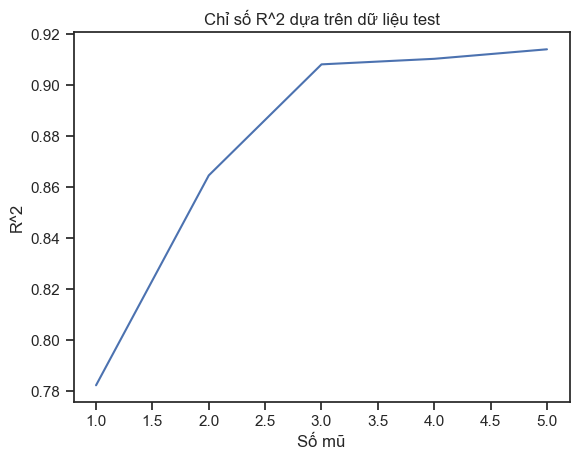

In [101]:
Rsquare_test = list()

order = list(range(1, 6))

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lre.fit(x_train_pr, y_train)
    Rsquare_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsquare_test)
plt.xlabel('Số mũ')
plt.ylabel('R^2')
plt.title("Chỉ số R^2 dựa trên dữ liệu test")

Có thể dễ dàng nhận thấy số mũ càng cao thì mô hình sẽ càng hiệu quả, tuy nhiên bù lại số mũ cao cũng dẫn đến việc mô hình chạy lâu. Ta có thể thấy kể từ khi số mũ là 3 trở lên tốc độ tăng chỉ số R^2 là không đáng kể. Vì vậy để tối ưu nhất ta sẽ chọn mức số mũ là 3.

In [102]:
pr3 = PolynomialFeatures(degree=3)

In [103]:
x_train_pr3 = pr3.fit_transform(x_train)
x_test_pr3 = pr3.fit_transform(x_test)

In [104]:
lre.fit(x_train_pr3, y_train)
yhat_test_pr3 = lre.predict(x_test_pr3)

C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(ActualFunction, hist=False, color='r', label=ActualName)
C:\Users\pc\AppData\Local\Temp\ipykernel_11708\1933737757.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = 

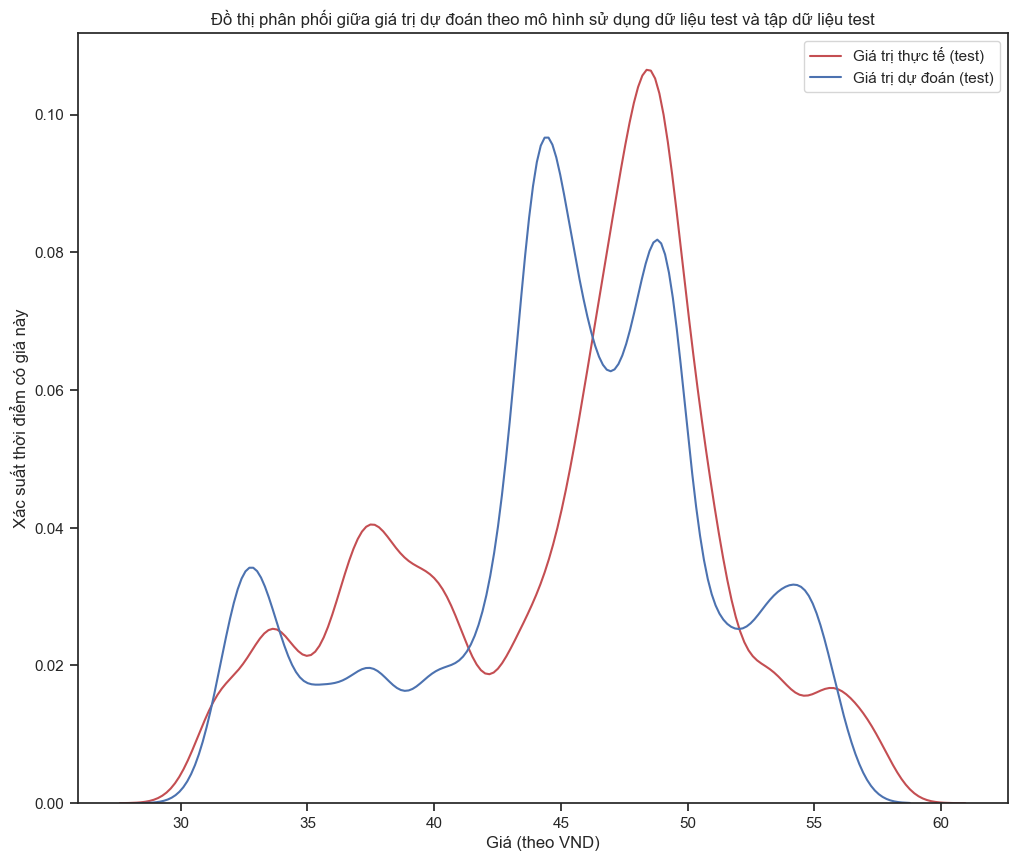

In [105]:
Title = "Đồ thị phân phối giữa giá trị dự đoán theo mô hình sử dụng dữ liệu test và tập dữ liệu test"
DistributionPlot(y_test, yhat_test_pr3, "Giá trị thực tế (test)", "Giá trị dự đoán (test)", Title)

In [106]:
print("Giá trị dự đoán:", yhat_test_pr3[0:4])
print("Giá trị thực tế:", y_test[0:4].values)

Giá trị dự đoán: [43.03748818 43.92289612 35.37796877 44.06546022]
Giá trị thực tế: [43.45 45.07 36.48 42.85]


In [107]:
print("Chỉ số R^2 của mô hình hồi quy đa thức bậc 3 đối với tệp dữ liệu test là", lre.score(x_test_pr3, y_test))

Chỉ số R^2 của mô hình hồi quy đa thức bậc 3 đối với tệp dữ liệu test là 0.9082555955400007


# Kết luận: Mặc dù mô hình hồi quy tuyến tính đa thức bậc 3 không phải là mô hình hiệu quả nhất xét theo chỉ số R^2 tuy nhiên dựa trên cả 2 yếu tố hiệu quả và thời gian thì mô hình pr3 ở trên sẽ là mô hình hiệu quả nhất 